In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
wages = pd.read_csv('./median_average_wages.csv')
wages.head()

,year,median,average,men_median,men_average,women_median,women_average,white_median,white_average,black_median,...,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,recent_high-school_graduate,men_recent_high-school_graduate,women_recent_high-school_graduate,recent_college_graduate,men_recent_college_graduate,women_recent_college_graduate
0,2022,22.88,32.00,24.91,35.82,20.74,27.86,24.96,34.49,19.60,...,19.00,23.99,17.54,22.60,16.02,16.86,14.77,25.68,28.24,23.74
1,2021,23.05,32.08,24.93,35.61,21.46,28.28,25.40,34.50,19.45,...,18.85,24.13,17.77,22.90,15.23,15.86,14.33,25.68,28.66,23.47
2,2020,23.64,32.54,25.95,36.03,21.72,28.75,25.98,34.86,19.85,...,19.26,24.87,17.55,23.03,14.65,15.48,13.55,27.42,29.01,26.26
3,2019,22.12,30.36,24.04,33.65,20.42,26.83,24.39,32.79,18.45,...,18.08,23.17,17.08,21.50,14.54,15.36,13.47,24.70,26.59,23.30
4,2018,21.90,29.83,23.42,33.19,19.73,26.21,23.97,32.44,17.57,...,17.34,22.55,16.24,20.60,13.83,14.59,12.71,24.08,25.66,22.84


In [327]:
wages

,year,median,average,men_median,men_average,women_median,women_average,white_median,white_average,black_median,...,hispanic_women_median,hispanic_women_average,recent_HS_grad,men_recent_HS_grad,women_recent_HS_grad,recent_college_grad,men_recent_college_grad,women_recent_college_grad,gender_wage_gap_average,gender_wage_gap_median
0,2022,22.88,32.00,24.91,35.82,20.74,27.86,24.96,34.49,19.60,...,17.54,22.60,16.02,16.86,14.77,25.68,28.24,23.74,7.96,4.17
1,2021,23.05,32.08,24.93,35.61,21.46,28.28,25.40,34.50,19.45,...,17.77,22.90,15.23,15.86,14.33,25.68,28.66,23.47,7.33,3.47
2,2020,23.64,32.54,25.95,36.03,21.72,28.75,25.98,34.86,19.85,...,17.55,23.03,14.65,15.48,13.55,27.42,29.01,26.26,7.28,4.23
3,2019,22.12,30.36,24.04,33.65,20.42,26.83,24.39,32.79,18.45,...,17.08,21.50,14.54,15.36,13.47,24.70,26.59,23.30,6.82,3.62
4,2018,21.90,29.83,23.42,33.19,19.73,26.21,23.97,32.44,17.57,...,16.24,20.60,13.83,14.59,12.71,24.08,25.66,22.84,6.98,3.69
5,2017,21.55,29.21,23.78,32.27,19.69,25.91,23.87,31.64,17.84,...,15.75,20.54,13.50,14.23,12.55,24.08,25.94,22.63,6.36,4.09
6,2016,21.36,29.00,23.44,32.18,19.44,25.58,23.56,31.30,18.15,...,15.72,20.18,13.22,13.79,12.44,22.89,24.96,21.36,6.60,4.00
7,2015,20.99,28.43,23.19,31.52,19.07,25.11,23.37,30.75,17.38,...,14.93,19.74,13.19,13.65,12.51,22.75,25.53,20.56,6.41,4.12
8,2014,20.65,27.36,22.43,30.08,18.63,24.45,22.73,29.49,17.25,...,14.83,19.17,12.52,13.39,11.34,22.07,24.89,19.84,5.63,3.80
9,2013,20.63,27.54,22.63,30.49,18.87,24.38,22.73,29.72,17.61,...,15.01,19.05,12.38,13.11,11.42,21.42,23.75,19.57,6.11,3.76


In [4]:
wages.tail()

,year,median,average,men_median,men_average,women_median,women_average,white_median,white_average,black_median,...,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,recent_high-school_graduate,men_recent_high-school_graduate,women_recent_high-school_graduate,recent_college_graduate,men_recent_college_graduate,women_recent_college_graduate
45,1977,19.36,22.75,23.92,26.73,15.11,17.44,20.00,23.38,16.23,...,14.06,16.91,13.25,15.45,NaN,NaN,NaN,NaN,NaN,NaN
46,1976,19.34,22.88,23.69,26.73,15.22,17.64,20.06,23.47,16.25,...,13.97,16.73,13.77,15.84,NaN,NaN,NaN,NaN,NaN,NaN
47,1975,19.39,22.62,24.08,26.46,15.08,17.24,19.96,23.30,16.15,...,13.41,16.14,13.50,15.07,NaN,NaN,NaN,NaN,NaN,NaN
48,1974,19.38,22.57,23.70,26.48,14.88,17.01,20.04,23.21,16.07,...,13.46,15.68,13.26,15.42,NaN,NaN,NaN,NaN,NaN,NaN
49,1973,19.77,22.99,24.00,26.96,15.10,17.31,20.53,23.72,15.96,...,13.38,15.83,13.78,15.39,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wages.dtypes

year                                   int64
median                               float64
average                              float64
men_median                           float64
men_average                          float64
women_median                         float64
women_average                        float64
white_median                         float64
white_average                        float64
black_median                         float64
black_average                        float64
hispanic_median                      float64
hispanic_average                     float64
white_men_median                     float64
white_men_average                    float64
black_men_median                     float64
black_men_average                    float64
hispanic_men_median                  float64
hispanic_men_average                 float64
white_women_median                   float64
white_women_average                  float64
black_women_median                   float64
black_wome

In [6]:
wages[['men_average','women_average']].describe()

,men_average,women_average
count,50.000000,50.000000
mean,28.921400,21.699400
std,2.706539,3.362138
min,26.200000,17.010000
25%,26.630000,18.540000
50%,27.855000,21.365000
75%,30.185000,24.295000
max,36.030000,28.750000


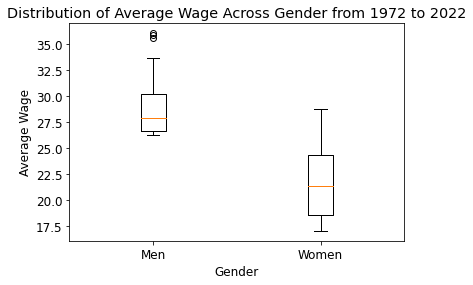

In [342]:
columns = ['men_average', 'women_average']
plt.rcParams.update({'font.size': 12})
plt.boxplot(wages[columns])
plt.title("Distribution of Average Wage Across Gender from 1972 to 2022")
plt.xlabel("Gender")
plt.ylabel("Average Wage")
plt.xticks([1, 2], ['Men', 'Women'])
plt.show()

In [7]:
wages[['white_average','black_average','hispanic_average']].describe()

,white_average,black_average,hispanic_average
count,50.00000,50.000000,50.000000
mean,27.03100,20.979400,19.976800
std,3.46881,2.005694,1.833755
min,23.08000,18.360000,18.010000
25%,23.93000,19.217500,18.762500
50%,26.00500,20.325000,19.250000
75%,29.43500,22.335000,20.685000
max,34.86000,26.030000,25.290000


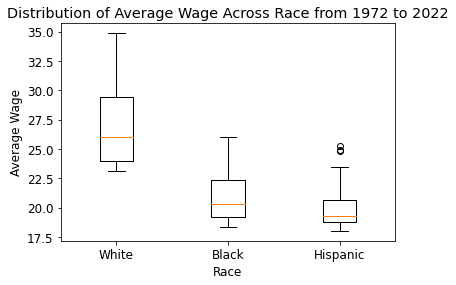

In [343]:
columns = ['white_average', 'black_average', 'hispanic_average']
plt.rcParams.update({'font.size': 12})
plt.boxplot(wages[columns])
plt.title("Distribution of Average Wage Across Race from 1972 to 2022")
plt.xlabel("Race")
plt.ylabel("Average Wage")
plt.xticks([1, 2, 3], ['White', 'Black', 'Hispanic'])
plt.show()

In [346]:
wages['gender_wage_gap_average'] = wages['men_average']-wages['women_average']
wages['gender_wage_gap_median'] = wages['men_median']-wages['women_median']
wages[['year','gender_wage_gap_average','gender_wage_gap_median']].head()

,year,gender_wage_gap_average,gender_wage_gap_median
0,2022,7.96,4.17
1,2021,7.33,3.47
2,2020,7.28,4.23
3,2019,6.82,3.62
4,2018,6.98,3.69


In [9]:
wages[:5][['gender_wage_gap_average']].describe()

,gender_wage_gap_average
count,5.000000
mean,7.274000
std,0.437699
min,6.820000
25%,6.980000
50%,7.280000
75%,7.330000
max,7.960000


In [10]:
wages[-5:][['gender_wage_gap_average']].describe()

,gender_wage_gap_average
count,5.000000
mean,9.344000
std,0.219272
min,9.090000
25%,9.220000
50%,9.290000
75%,9.470000
max,9.650000


In [11]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               50 non-null     int64  
 1   median                             50 non-null     float64
 2   average                            50 non-null     float64
 3   men_median                         50 non-null     float64
 4   men_average                        50 non-null     float64
 5   women_median                       50 non-null     float64
 6   women_average                      50 non-null     float64
 7   white_median                       50 non-null     float64
 8   white_average                      50 non-null     float64
 9   black_median                       50 non-null     float64
 10  black_average                      50 non-null     float64
 11  hispanic_median                    50 non-null     float64
 

In [348]:
wages.rename(columns = {'recent_high-school_graduate':'recent_HS_grad', 'men_recent_high-school_graduate':'men_recent_HS_grad',
                       'women_recent_high-school_graduate':'women_recent_HS_grad','recent_college_graduate':'recent_college_grad', 
                        'men_recent_college_graduate':'men_recent_college_grad','women_recent_college_graduate':'women_recent_college_grad'},
                        inplace = True)
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       50 non-null     int64  
 1   median                     50 non-null     float64
 2   average                    50 non-null     float64
 3   men_median                 50 non-null     float64
 4   men_average                50 non-null     float64
 5   women_median               50 non-null     float64
 6   women_average              50 non-null     float64
 7   white_median               50 non-null     float64
 8   white_average              50 non-null     float64
 9   black_median               50 non-null     float64
 10  black_average              50 non-null     float64
 11  hispanic_median            50 non-null     float64
 12  hispanic_average           50 non-null     float64
 13  white_men_median           50 non-null     float64
 

<AxesSubplot:>

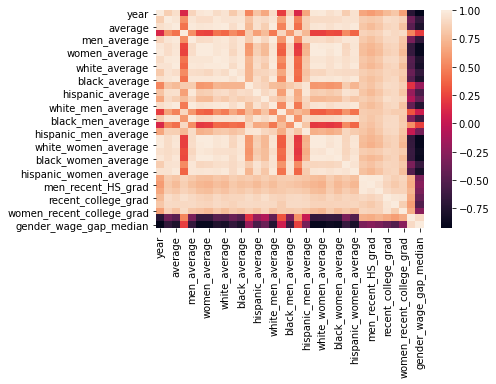

In [13]:
sns.heatmap(wages.corr())

<AxesSubplot:xlabel='year', ylabel='average'>

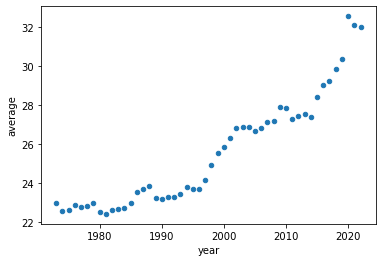

In [16]:
wages.plot(kind = "scatter", x = "year", y = "average")

[Text(0.5, 1.0, 'Average US Wage (USD) From 1972 to 2022'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Wage')]

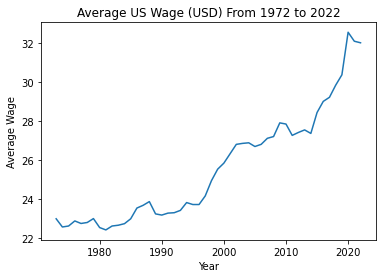

In [33]:
plt.rcParams.update({'font.size': 10})
sns.lineplot(x='year', y='average', data=wages).set(title='Average US Wage (USD) From 1972 to 2022', xlabel='Year', ylabel='Average Wage')

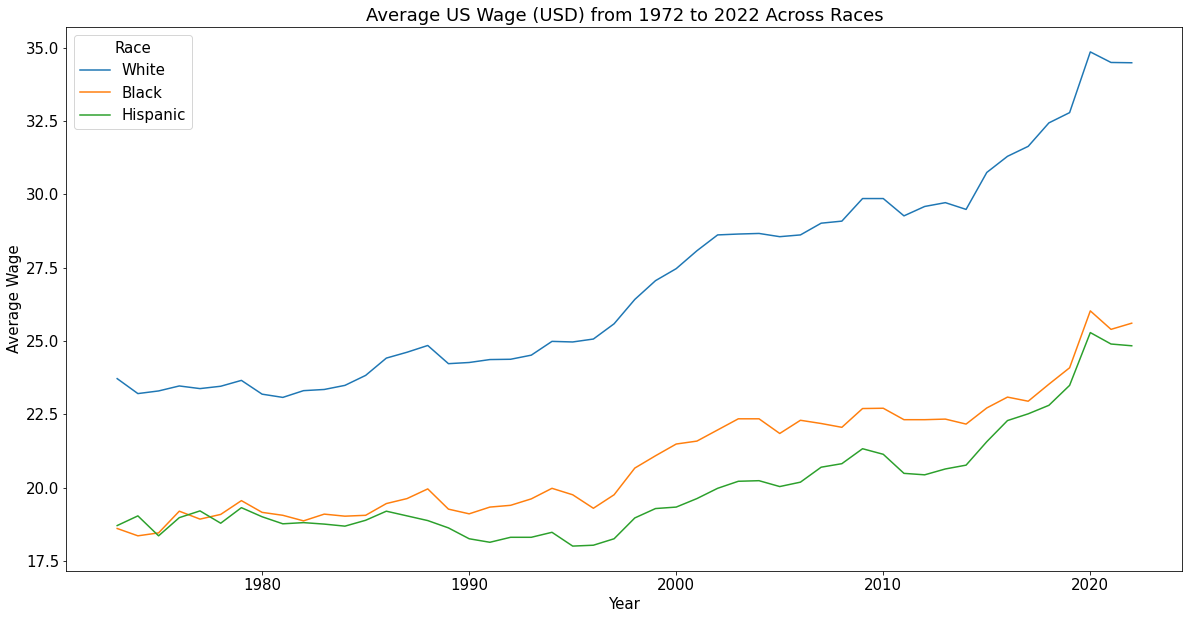

In [45]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(wages['year'], wages['white_average'], label = "White") 
plt.plot(wages['year'], wages['black_average'], label = "Black") 
plt.plot(wages['year'], wages['hispanic_average'], label = "Hispanic") 
plt.legend(title="Race")
plt.title("Average US Wage (USD) from 1972 to 2022 Across Races")
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.show()

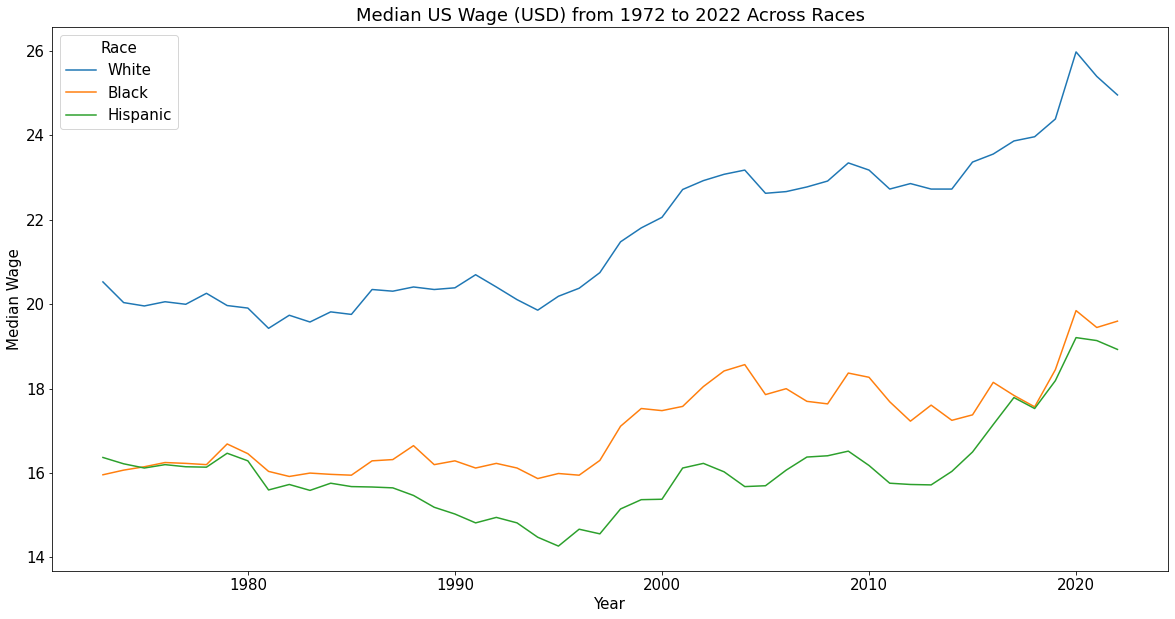

In [282]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(wages['year'], wages['white_median'], label = "White") 
plt.plot(wages['year'], wages['black_median'], label = "Black") 
plt.plot(wages['year'], wages['hispanic_median'], label = "Hispanic") 
plt.legend(title="Race")
plt.title("Median US Wage (USD) from 1972 to 2022 Across Races")
plt.xlabel("Year")
plt.ylabel("Median Wage")
plt.show()

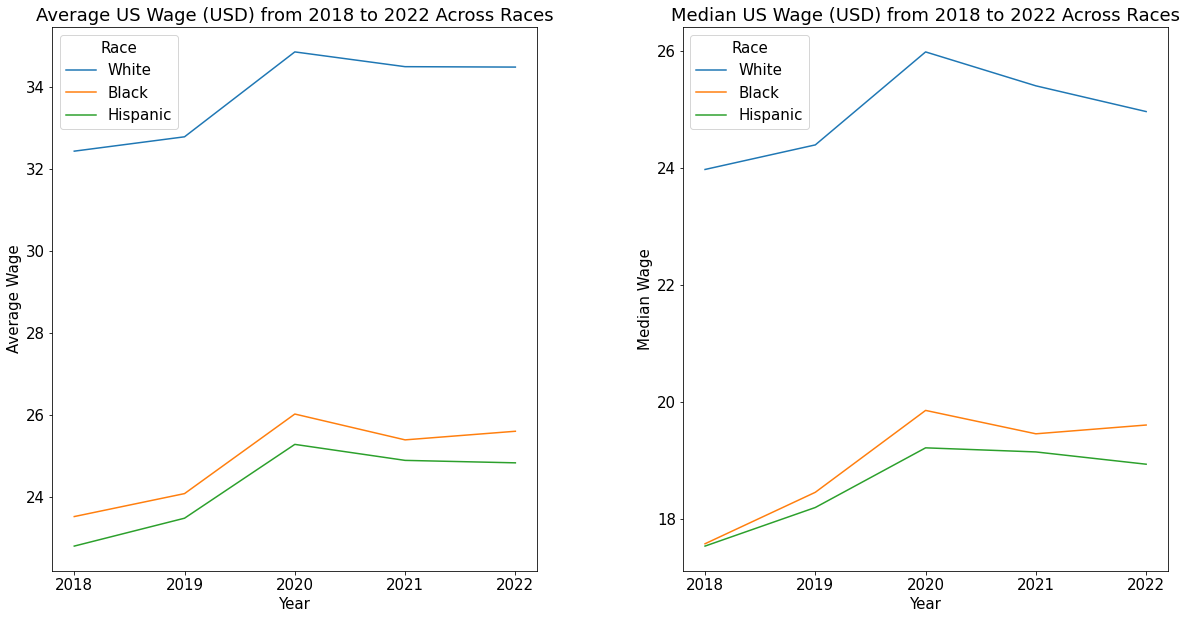

In [304]:
last_five_years = wages[:5]
figure, axis = plt.subplots(1, 2, figsize=(20, 10)) 
plt.rcParams.update({'font.size': 15})
plt.subplots_adjust(wspace=0.3)
axis[0].set_xticks(last_five_years['year']) # deals with problem where steps are by half-years
axis[0].plot(last_five_years['year'], last_five_years['white_average'], label = "White") 
axis[0].plot(last_five_years['year'], last_five_years['black_average'], label = "Black") 
axis[0].plot(last_five_years['year'], last_five_years['hispanic_average'], label = "Hispanic") 
axis[0].legend(title="Race")
axis[0].set_title("Average US Wage (USD) from 2018 to 2022 Across Races")
axis[0].set_xlabel("Year",fontsize=15)
axis[0].set_ylabel("Average Wage",fontsize=15)

axis[1].set_xticks(last_five_years['year'])
axis[1].plot(last_five_years['year'], last_five_years['white_median'], label = "White") 
axis[1].plot(last_five_years['year'], last_five_years['black_median'], label = "Black") 
axis[1].plot(last_five_years['year'], last_five_years['hispanic_median'], label = "Hispanic") 
axis[1].legend(title="Race")
axis[1].set_title("Median US Wage (USD) from 2018 to 2022 Across Races")
axis[1].set_xlabel("Year",fontsize=15)
axis[1].set_ylabel("Median Wage",fontsize=15)
plt.show()

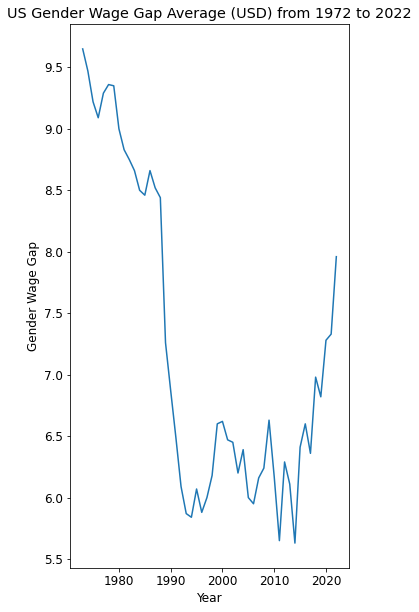

In [310]:
fig = plt.figure(figsize=(5, 10))
plt.rcParams.update({'font.size': 12})
plt.plot(wages['year'], wages['gender_wage_gap_average'])
plt.title("US Gender Wage Gap Average (USD) from 1972 to 2022")
plt.xlabel("Year")
plt.ylabel("Gender Wage Gap")
plt.show()

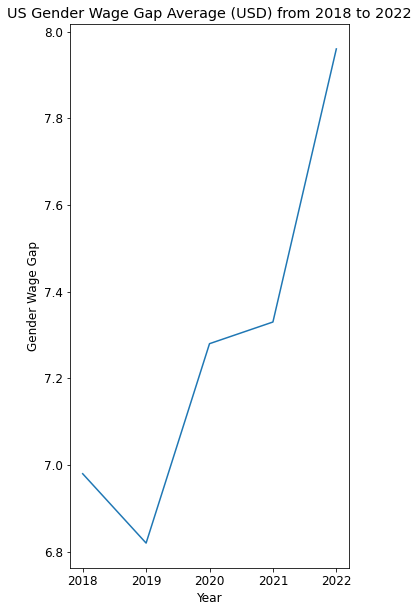

In [311]:
fig = plt.figure(figsize=(5, 10))
plt.rcParams.update({'font.size': 12})
plt.plot(last_five_years['year'], last_five_years['gender_wage_gap_average'])
plt.title("US Gender Wage Gap Average (USD) from 2018 to 2022")
plt.xlabel("Year")
plt.ylabel("Gender Wage Gap")
plt.show()

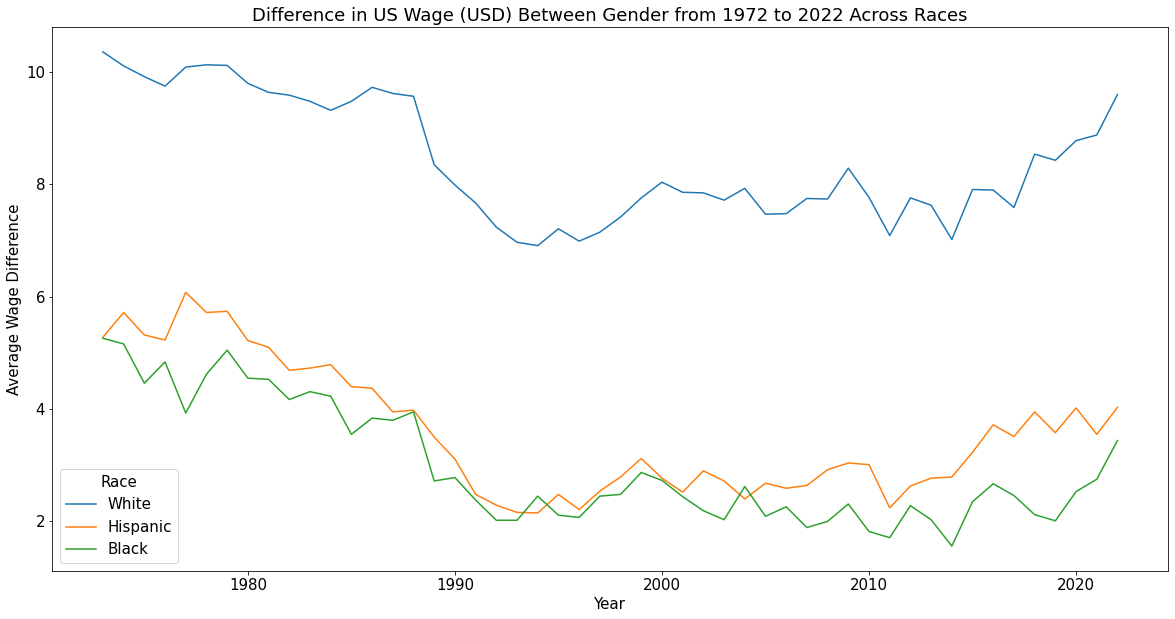

In [58]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(wages['year'], wages['white_men_average']-wages['white_women_average'], label = "White") 
plt.plot(wages['year'], wages['hispanic_men_average']-wages['hispanic_women_average'], label = "Hispanic") 
plt.plot(wages['year'], wages['black_men_average']-wages['black_women_average'], label = "Black") 
plt.legend(title="Race")
plt.title("Difference in US Wage (USD) Between Gender from 1972 to 2022 Across Races")
plt.xlabel("Year")
plt.ylabel("Average Wage Difference")
plt.show()

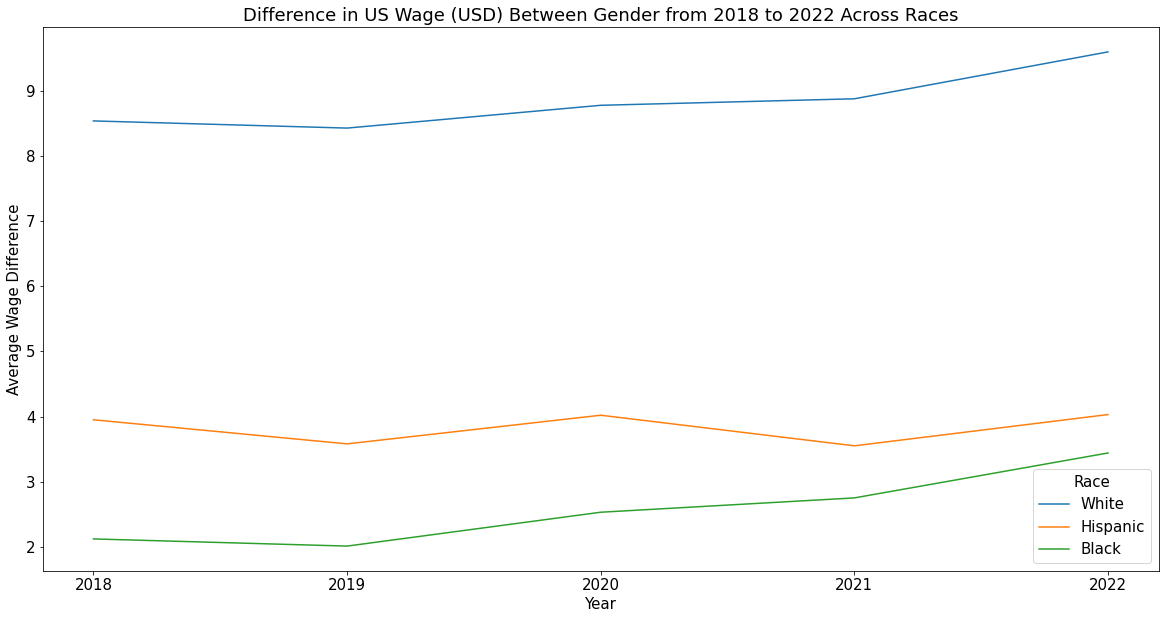

In [57]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.xticks(last_five_years['year'])
plt.plot(last_five_years['year'], last_five_years['white_men_average']-last_five_years['white_women_average'], label = "White") 
plt.plot(last_five_years['year'], last_five_years['hispanic_men_average']-last_five_years['hispanic_women_average'], label = "Hispanic") 
plt.plot(last_five_years['year'], last_five_years['black_men_average']-last_five_years['black_women_average'], label = "Black") 
plt.legend(title="Race")
plt.title("Difference in US Wage (USD) Between Gender from 2018 to 2022 Across Races")
plt.xlabel("Year")
plt.ylabel("Average Wage Difference")
plt.show()

In [78]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    return corr.drop(labels=labels_to_drop).sort_values(ascending=False)

get_top_abs_correlations(wages)[:20]

women_average        white_women_average       0.999510
average              white_average             0.998254
                     white_men_average         0.997591
women_average        white_women_median        0.996499
white_women_median   white_women_average       0.996445
white_average        white_men_average         0.994632
women_average        black_women_average       0.994352
women_median         white_women_median        0.994160
                     black_women_average       0.993869
                     women_average             0.993533
men_average          white_men_average         0.993299
average              black_average             0.991789
white_women_average  black_women_average       0.991711
white_women_median   black_women_average       0.991203
recent_HS_grad       men_recent_HS_grad        0.991149
women_median         white_women_average       0.991126
white_average        black_average             0.989304
average              hispanic_women_average    0

In [79]:
wages.corr()

,year,median,average,men_median,men_average,women_median,women_average,white_median,white_average,black_median,...,hispanic_women_median,hispanic_women_average,recent_HS_grad,men_recent_HS_grad,women_recent_HS_grad,recent_college_grad,men_recent_college_grad,women_recent_college_grad,gender_wage_gap_average,gender_wage_gap_median
year,1.000000,0.856232,0.938962,0.117166,0.881970,0.971971,0.985096,0.920262,0.955101,0.833838,...,0.845474,0.947675,0.659362,0.610311,0.662081,0.757283,0.815353,0.628272,-0.716166,-0.923218
median,0.856232,1.000000,0.969651,0.549828,0.968771,0.930146,0.926018,0.977810,0.960572,0.960876,...,0.952044,0.948480,0.849321,0.820081,0.844040,0.925994,0.915418,0.865260,-0.380470,-0.671707
average,0.938962,0.969651,1.000000,0.429853,0.987328,0.966652,0.976627,0.985442,0.998254,0.931756,...,0.956341,0.988789,0.807094,0.763846,0.812250,0.887545,0.906581,0.793451,-0.473327,-0.766562
men_median,0.117166,0.549828,0.429853,1.000000,0.550493,0.256779,0.243820,0.441693,0.384230,0.537073,...,0.539002,0.372289,0.874925,0.850437,0.877396,0.946244,0.902530,0.921511,0.518903,0.224977
men_average,0.881970,0.968771,0.987328,0.550493,1.000000,0.920645,0.931964,0.966968,0.977926,0.927334,...,0.970439,0.970986,0.828636,0.785559,0.835682,0.902784,0.915742,0.814017,-0.330505,-0.661807
women_median,0.971971,0.930146,0.966652,0.256779,0.920645,1.000000,0.993533,0.967404,0.974338,0.918241,...,0.898196,0.967959,0.781563,0.741537,0.784612,0.874402,0.889331,0.790036,-0.657081,-0.883925
women_average,0.985096,0.926018,0.976627,0.243820,0.931964,0.993533,1.000000,0.966981,0.985248,0.900693,...,0.902599,0.977454,0.770376,0.726865,0.773320,0.858251,0.885893,0.757471,-0.650195,-0.883675
white_median,0.920262,0.977810,0.985442,0.441693,0.966968,0.967404,0.966981,1.000000,0.985233,0.953312,...,0.936773,0.964262,0.817159,0.776825,0.822494,0.907874,0.913447,0.828935,-0.490883,-0.761591
white_average,0.955101,0.960572,0.998254,0.384230,0.977926,0.974338,0.985248,0.985233,1.000000,0.922811,...,0.943240,0.986903,0.791389,0.747317,0.795899,0.873491,0.898272,0.773896,-0.515474,-0.796385
black_median,0.833838,0.960876,0.931756,0.537073,0.927334,0.918241,0.900693,0.953312,0.922811,1.000000,...,0.910895,0.910124,0.851269,0.825952,0.847120,0.888513,0.874899,0.838755,-0.401379,-0.665876


In [356]:
correlation_with_year = wages.corr()['year'].abs().sort_values().to_dict()
correlation_with_year

{'men_median': 0.11716648064353602,
 'hispanic_men_median': 0.12070846104407745,
 'black_men_median': 0.22236122906298872,
 'hispanic_median': 0.511705339607104,
 'men_recent_HS_grad': 0.610311238397089,
 'women_recent_college_grad': 0.6282719450084714,
 'recent_HS_grad': 0.6593620544432865,
 'hispanic_men_average': 0.6599618033115774,
 'women_recent_HS_grad': 0.6620810425607753,
 'white_men_median': 0.6686472176221684,
 'gender_wage_gap_average': 0.7161662823168695,
 'recent_college_grad': 0.7572833150254393,
 'hispanic_average': 0.8043372719791797,
 'men_recent_college_grad': 0.8153526498981241,
 'black_median': 0.8338377490066812,
 'hispanic_women_median': 0.8454744470867002,
 'black_men_average': 0.8469142710342991,
 'median': 0.8562316054443779,
 'men_average': 0.881969807541374,
 'white_median': 0.9202620485689657,
 'gender_wage_gap_median': 0.9232183116110837,
 'white_men_average': 0.9276980170944498,
 'black_average': 0.9361214521490253,
 'average': 0.9389615063481943,
 'black_

Text(0, 0.5, 'Magnitude of Correlation Coefficient')

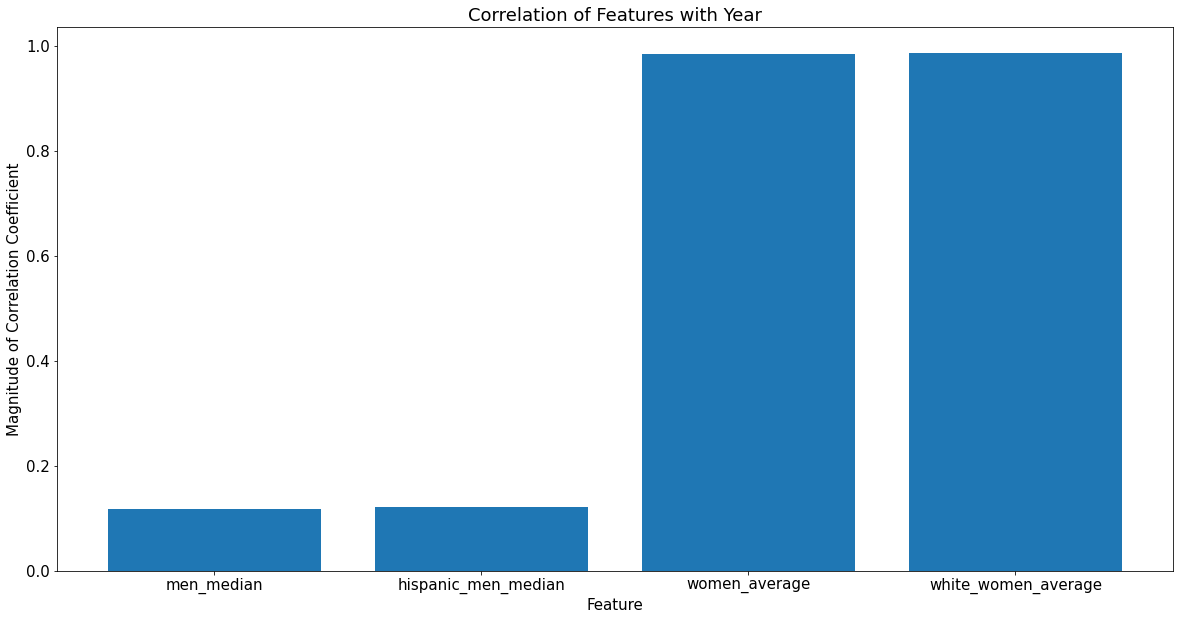

In [364]:
x = ['men_median', 'hispanic_men_median', 'women_average', 'white_women_average']
y = [correlation_with_year[i] for i in x]
plt.figure(figsize = (20,10))
plt.bar(x, y)
plt.title("Correlation of Features with Year")
plt.xlabel("Feature")
plt.ylabel("Magnitude of Correlation Coefficient")

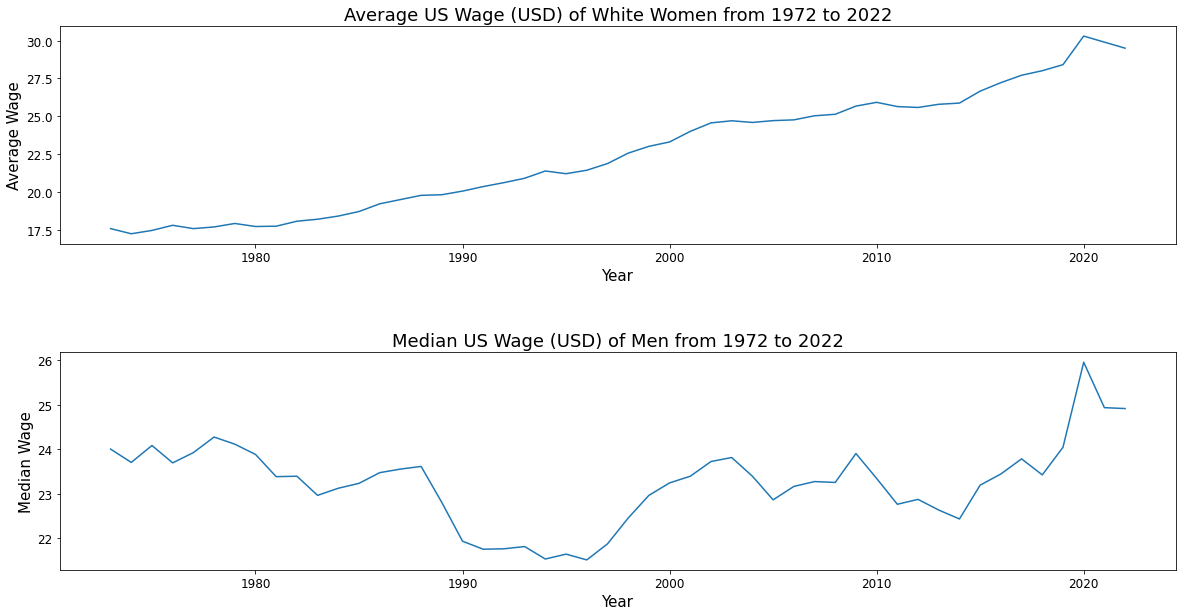

In [361]:
figure, axis = plt.subplots(2, 1, figsize=(20, 10)) 
plt.rcParams.update({'font.size': 15})
plt.subplots_adjust(hspace=0.5)
axis[0].plot(wages['year'], wages['white_women_average']) 
axis[0].set_title("Average US Wage (USD) of White Women from 1972 to 2022")
axis[0].set_xlabel("Year",fontsize=15)
axis[0].set_ylabel("Average Wage",fontsize=15)

axis[1].plot(wages['year'], wages['men_median']) 
axis[1].set_title("Median US Wage (USD) of Men from 1972 to 2022")
axis[1].set_xlabel("Year",fontsize=15)
axis[1].set_ylabel("Median Wage",fontsize=15)
plt.show()

In [107]:
def abs_correlation_between_median_and_average(df):
    median = [col for col in df.columns if 'median' in col]
    average = [col for col in df.columns if 'average' in col]
    correlations = pd.DataFrame(index=average, columns=median)
    for avg_col in average:
        for med_col in median:
            common_index = df[avg_col].notna() & df[med_col].notna()
            if common_index.any():
                correlation = df[avg_col][common_index].corr(df[med_col][common_index])
                correlations.at[avg_col, med_col] = np.abs(correlation)
    
    return correlations
median_average_corr = abs_correlation_between_median_and_average(wages)
median_average_corr

,median,men_median,women_median,white_median,black_median,hispanic_median,white_men_median,black_men_median,hispanic_men_median,white_women_median,black_women_median,hispanic_women_median,gender_wage_gap_median
average,0.969651,0.429853,0.966652,0.985442,0.931756,0.754607,0.853256,0.503184,0.421147,0.968132,0.941209,0.956341,0.766562
men_average,0.968771,0.550493,0.920645,0.966968,0.927334,0.836016,0.899887,0.587733,0.544929,0.91989,0.900735,0.970439,0.661807
women_average,0.926018,0.24382,0.993533,0.966981,0.900693,0.606573,0.754742,0.353095,0.223681,0.996499,0.967814,0.902599,0.883675
white_average,0.960572,0.38423,0.974338,0.985233,0.922811,0.721348,0.832873,0.46665,0.376989,0.97862,0.945724,0.94324,0.796385
black_average,0.968898,0.42965,0.971427,0.98046,0.954043,0.727772,0.853655,0.522476,0.393282,0.966955,0.96277,0.950405,0.771474
hispanic_average,0.93643,0.628668,0.845941,0.912649,0.880583,0.910217,0.905557,0.618475,0.669495,0.844094,0.827297,0.961763,0.548668
white_men_average,0.96752,0.462865,0.954607,0.981442,0.929642,0.774054,0.870137,0.523902,0.452695,0.956899,0.93166,0.959491,0.738445
black_men_average,0.964003,0.594336,0.899841,0.95059,0.950297,0.831768,0.910322,0.654299,0.561522,0.893268,0.898418,0.957112,0.619619
hispanic_men_average,0.860342,0.748728,0.708301,0.814495,0.797077,0.965293,0.900083,0.689867,0.81086,0.706628,0.691107,0.898973,0.351812
white_women_average,0.920913,0.233223,0.991126,0.965328,0.893014,0.601017,0.748899,0.342427,0.21815,0.996445,0.961916,0.896423,0.886376


In [124]:
sorted_med_avg_corrs = median_average_corr.unstack().sort_values(ascending=False)
len([corr for corr in sorted_med_avg_corrs if corr>0.8])/len(sorted_med_avg_corrs)

0.5798816568047337

In [157]:
def med_avg_match(df):
    median = [col for col in df.columns if 'median' in col]
    average = [col for col in df.columns if 'average' in col]
    correlations = {}
    for i in range(len(average)):
        avg_col = average[i]
        med_col = median[i]
        common_index = df[avg_col].notna() & df[med_col].notna()
        if common_index.any():
            correlation = df[avg_col][common_index].corr(df[med_col][common_index])
            correlations[(avg_col, med_col)] = np.abs(correlation)
    return correlations
med_avg = med_avg_match(wages)
med_avg

{('average', 'median'): 0.969650585792663,
 ('men_average', 'men_median'): 0.5504933355859956,
 ('women_average', 'women_median'): 0.9935328758412163,
 ('white_average', 'white_median'): 0.9852328538729292,
 ('black_average', 'black_median'): 0.9540429763064725,
 ('hispanic_average', 'hispanic_median'): 0.9102165678806642,
 ('white_men_average', 'white_men_median'): 0.8701369350570546,
 ('black_men_average', 'black_men_median'): 0.6542988664841011,
 ('hispanic_men_average', 'hispanic_men_median'): 0.8108595608559488,
 ('white_women_average', 'white_women_median'): 0.9964451613734822,
 ('black_women_average', 'black_women_median'): 0.9815109197408356,
 ('hispanic_women_average', 'hispanic_women_median'): 0.9604260379435484,
 ('gender_wage_gap_average', 'gender_wage_gap_median'): 0.9135201996023197}

Text(0, 0.5, 'Magnitude of Correlation Coefficient')

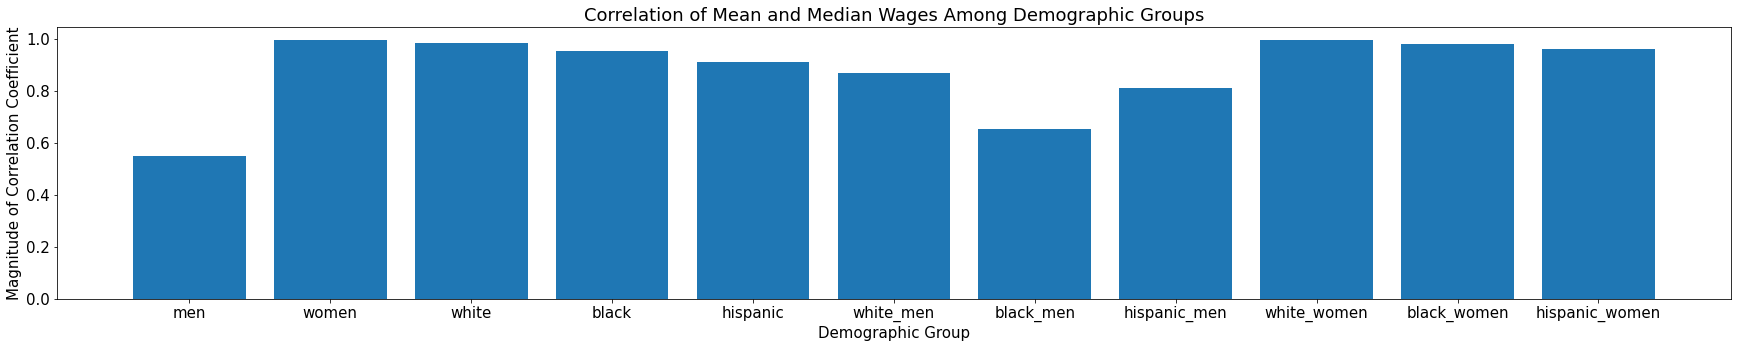

In [166]:
def generate_x(dic):
    x = []
    for cols in dic:
        common = ''
        for c in cols[0]:
            if c in cols[1]:
                common+=c
            else: break
        common = common[:-2]
        x.append(common)
    return x
x = generate_x(med_avg)[1:-1]
y = list(med_avg.values())[1:-1]
plt.figure(figsize = (30,5))
plt.bar(x, y)
plt.title("Correlation of Mean and Median Wages Among Demographic Groups")
plt.xlabel("Demographic Group")
plt.ylabel("Magnitude of Correlation Coefficient")

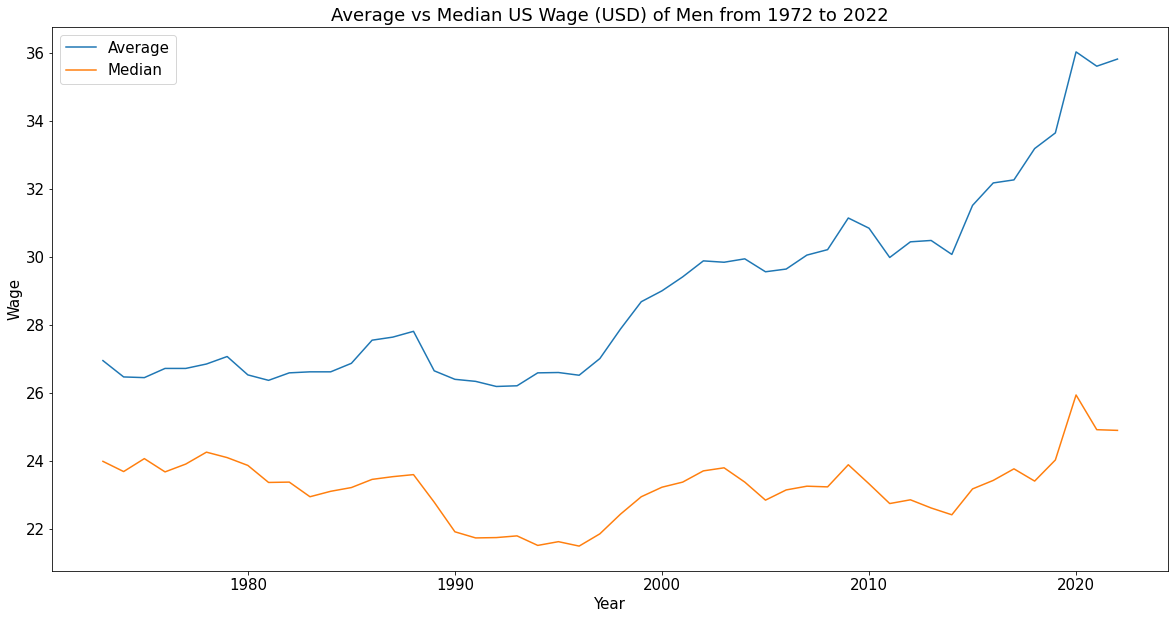

In [130]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(wages['year'], wages['men_average'], label = "Average") 
plt.plot(wages['year'], wages['men_median'], label = "Median") 
plt.legend()
plt.title("Average vs Median US Wage (USD) of Men from 1972 to 2022")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.show()

In [131]:
wages.columns

Index(['year', 'median', 'average', 'men_median', 'men_average',
       'women_median', 'women_average', 'white_median', 'white_average',
       'black_median', 'black_average', 'hispanic_median', 'hispanic_average',
       'white_men_median', 'white_men_average', 'black_men_median',
       'black_men_average', 'hispanic_men_median', 'hispanic_men_average',
       'white_women_median', 'white_women_average', 'black_women_median',
       'black_women_average', 'hispanic_women_median',
       'hispanic_women_average', 'recent_HS_grad', 'men_recent_HS_grad',
       'women_recent_HS_grad', 'recent_college_grad',
       'men_recent_college_grad', 'women_recent_college_grad',
       'gender_wage_gap_average', 'gender_wage_gap_median'],
      dtype='object')

In [366]:
corr = wages.corr()['recent_HS_grad']['recent_college_grad']
print(f"Correlation in wages between recent HS grads and recent college grads: {corr}")

Correlation in wages between recent HS grads and recent college grads: 0.9094200726039166


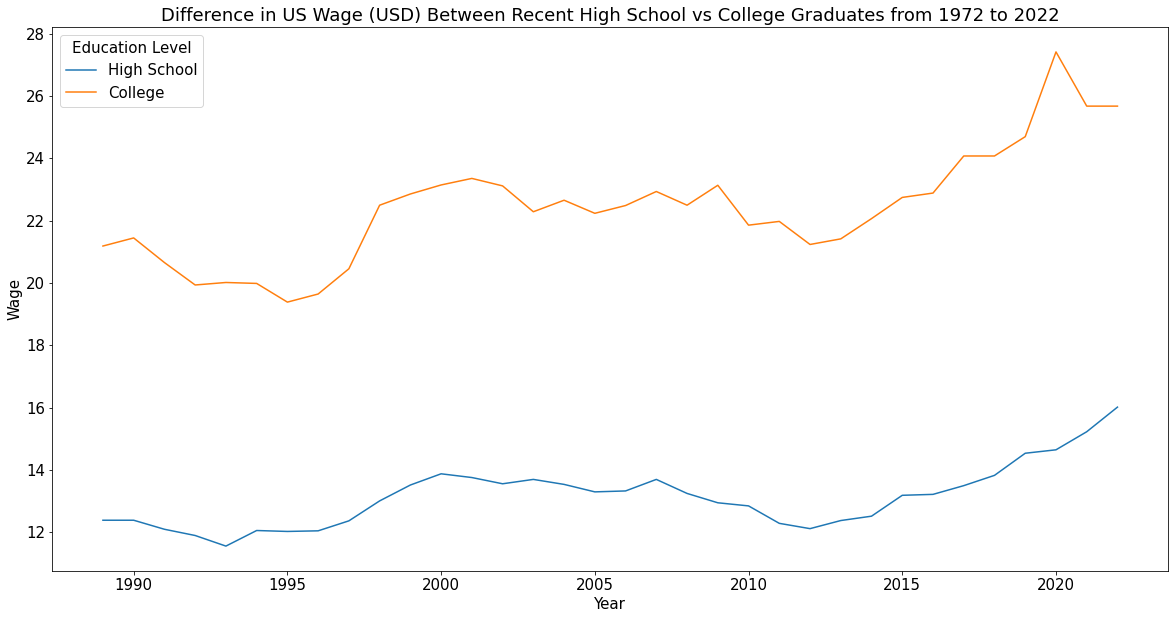

In [176]:
fig = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})
plt.plot(wages['year'], wages['recent_HS_grad'], label = "High School") 
plt.plot(wages['year'], wages['recent_college_grad'], label = "College")
plt.legend(title="Education Level")
plt.title("Difference in US Wage (USD) Between Recent High School vs College Graduates from 1972 to 2022")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.show()

In [177]:
wages.corr()['recent_HS_grad']['recent_college_grad']

0.9094200726039166

In [196]:
lowest_HS_wage_years = wages.nsmallest(10, 'recent_HS_grad').reset_index()
lowest_HS_wage_years['year']

0    1993
1    1992
2    1995
3    1996
4    1994
5    1991
6    2012
7    2011
8    1997
9    2013
Name: year, dtype: int64

In [197]:
lowest_college_wage_years = wages.nsmallest(10, 'recent_college_grad').reset_index()
lowest_college_wage_years['year']

0    1995
1    1996
2    1992
3    1994
4    1993
5    1997
6    1991
7    1989
8    2012
9    2013
Name: year, dtype: int64

In [203]:
years_lowest_wage_educ = pd.concat([lowest_HS_wage_years['year'],lowest_college_wage_years['year']],axis=1)
years_lowest_wage_educ.columns = ['Years of Lowest Wage for Recent HS Grads', 'Years of Lowest Wage for Recent College Grads']
years_lowest_wage_educ

,Years of Lowest Wage for Recent HS Grads,Years of Lowest Wage for Recent College Grads
0,1993,1995
1,1992,1996
2,1995,1992
3,1996,1994
4,1994,1993
5,1991,1997
6,2012,1991
7,2011,1989
8,1997,2012
9,2013,2013


Linear     R^2: 0.8816487104036685
Quadratic  R^2: 0.9554764973094224
Cubic      R^2: 0.955477531241092
Quartic    R^2: 0.9623740019749873


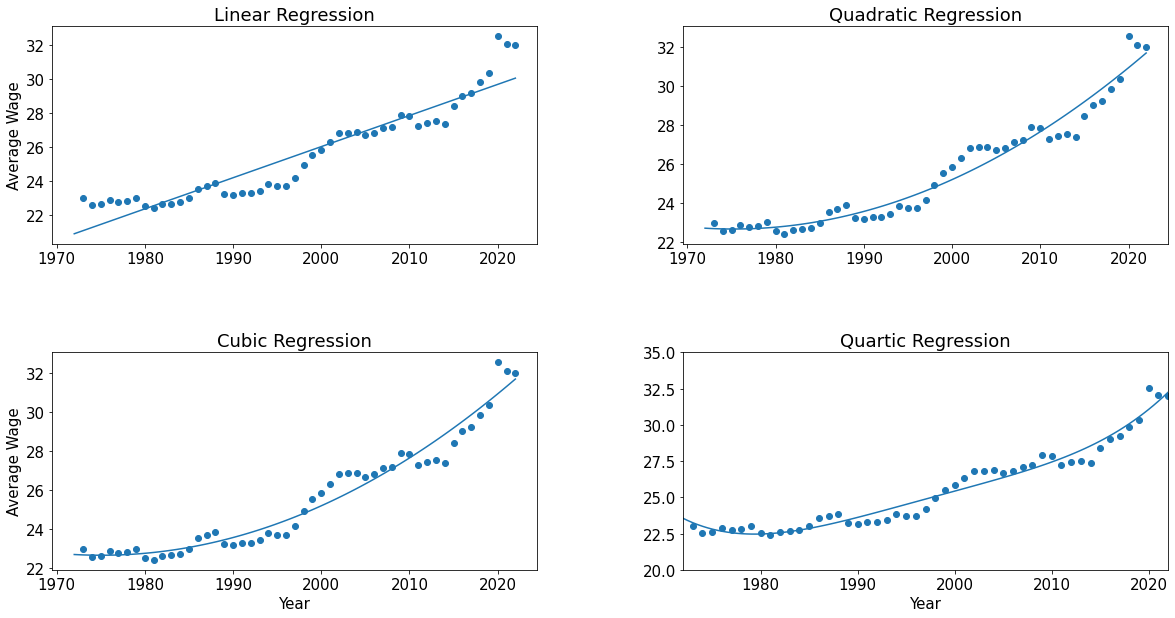

In [368]:
figure, axis = plt.subplots(2, 2, figsize=(20, 10)) 
plt.subplots_adjust(wspace=0.3, hspace=0.5)
deg = 1
X = wages['year']
Y = wages['average']
linmodel = np.poly1d(np.polyfit(X, Y, 1))
quadmodel = np.poly1d(np.polyfit(X, Y, 2))
cubmodel = np.poly1d(np.polyfit(X, Y, 3))
quatmodel = np.poly1d(np.polyfit(X, Y, 4))
myline = np.linspace(1972, 2022, 100)

axis[0,0].scatter(X, Y)
axis[0,1].scatter(X, Y)
axis[1,0].scatter(X, Y)
axis[1,1].scatter(X, Y)
axis[0,0].plot(myline, linmodel(myline))
axis[0,1].plot(myline, quadmodel(myline))
axis[1,0].plot(myline, cubmodel(myline))
axis[1,1].plot(myline, quatmodel(myline))
plt.xlim(1972, 2022)
plt.ylim(20, 35)
axis[0,0].set_title("Linear Regression")
axis[0,1].set_title("Quadratic Regression")
axis[1,0].set_title("Cubic Regression")
axis[1,1].set_title("Quartic Regression")
plt.setp(axis[-1, :], xlabel='Year')
plt.setp(axis[:, 0], ylabel='Average Wage')

print(f'Linear     R^2: {r2_score(Y, linmodel(X))}')
print(f'Quadratic  R^2: {r2_score(Y, quadmodel(X))}')
print(f'Cubic      R^2: {r2_score(Y, cubmodel(X))}')
print(f'Quartic    R^2: {r2_score(Y, quatmodel(X))}')
plt.show()

In [253]:
preds_10_yrs = []
for i in range(2023, 2033):
    preds_10_yrs.append(round(quadmodel(i),2)) # Dollar amount
preds_10_yrs

[32.06, 32.46, 32.87, 33.28, 33.7, 34.13, 34.57, 35.02, 35.47, 35.94]

In [237]:
quadmodel #4.12*10^-3 x^2 - 16.26x + 1608.12

poly1d([ 4.11603103e-03, -1.62600621e+01,  1.60811919e+04])

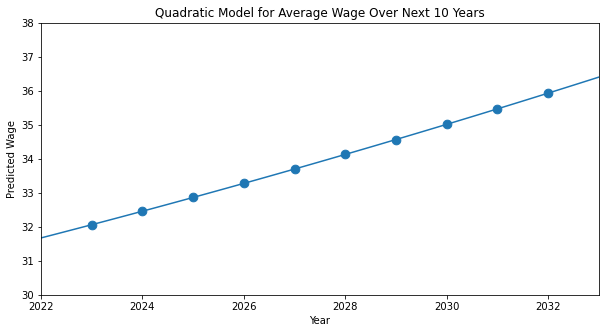

In [270]:
fig = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
newline = np.linspace(2022, 2033, 100)
X = [i+2023 for i in range(10)]
Y = preds_10_yrs
plt.scatter(X, Y, 75)
plt.plot(newline, quadmodel(newline))
plt.xlim(2022, 2033)
plt.ylim(30, 38)
plt.title("Quadratic Model for Average Wage Over Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Predicted Wage")
plt.show()

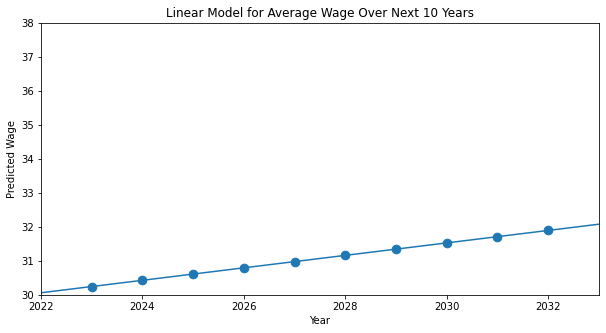

In [272]:
fig = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
newline = np.linspace(2022, 2033, 100)
X = [i+2023 for i in range(10)]
Y = linmodel(X)
plt.scatter(X, Y, 75)
plt.plot(newline, linmodel(newline))
plt.xlim(2022, 2033)
plt.ylim(30, 38)
plt.title("Linear Model for Average Wage Over Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Predicted Wage")
plt.show()

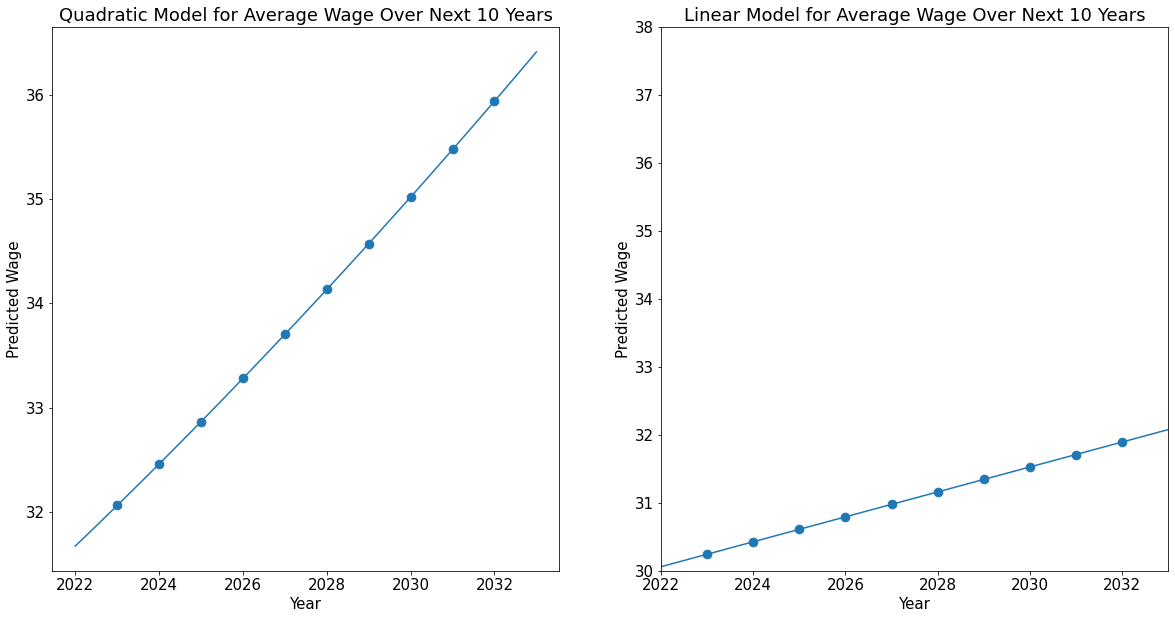

In [281]:
figure, axis = plt.subplots(1, 2, figsize=(20, 10)) 
plt.rcParams.update({'font.size': 15})
newline = np.linspace(2022, 2033, 100)
X = [i+2023 for i in range(10)]
Y_lin = linmodel(X)
Y_quad = quadmodel(X)
axis[0].scatter(X, Y_quad, 75)
axis[1].scatter(X, Y_lin, 75)
axis[0].plot(newline, quadmodel(newline))
axis[1].plot(newline, linmodel(newline))
plt.xlim(2022, 2033)
plt.ylim(30, 38)
axis[0].set_title("Quadratic Model for Average Wage Over Next 10 Years")
axis[1].set_title("Linear Model for Average Wage Over Next 10 Years")
plt.title("Linear Model for Average Wage Over Next 10 Years")
axis[0].set_xlabel("Year")
axis[1].set_xlabel("Year")
axis[0].set_ylabel("Predicted Wage")
axis[1].set_ylabel("Predicted Wage")
plt.show()